In [33]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from torchvision import transforms
torch.manual_seed(0)

In [34]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [35]:
model = torch.load('model_23c_3000n_10e.pt')
model.eval()
print('done')

done


In [36]:
classes = ['apple', 
           'banana',
           'cat',
           'dog',
           'elephant',
           'fish',
           'guitar',
           'hot air balloon',
           'house plant',
           'key',
           'lightning',
           'mountain',
           'nail',
           'owl',
           'palm tree',
           'pencil',
           'rhinoceros',
           'snake',
           'the eiffel tower',
           'umbrella',
           'vase',
           'watermelon',
           'zigzag'
          ]

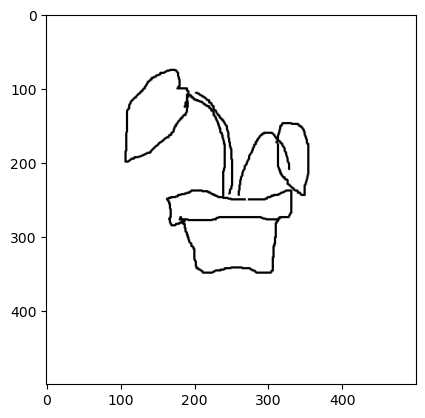

Top 5 Predictions;
Class house plant: 67.73%
Class vase: 14.99%
Class dog: 6.43%
Class nail: 2.50%
Class guitar: 2.27%


In [37]:
image_path = 'image3.png'
image = Image.open(image_path).convert('RGB')  
image_tensor = transform(image).unsqueeze(0)  

with torch.no_grad():
    output = model(image_tensor)
    probabilities = torch.nn.functional.softmax(output, dim=1)  
    top5_prob, top5_catid = torch.topk(probabilities, 5)


top5_prob = top5_prob.squeeze().tolist()
top5_catid = top5_catid.squeeze().tolist()

# Display the image
plt.imshow(image)
plt.show()

print('Top 5 Predictions;')
for i in range(5):
    print(f'Class {classes[top5_catid[i]]}: {top5_prob[i] * 100:.2f}%')